In [83]:
import autograd as autograd 
from autograd import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#### Quelques Fonctions

In [4]:
g = lambda X : (X[1])**2 +(X[0])**2

In [77]:
g1=lambda X : np.exp(-X[0]**2-X[1]**2)
g2=lambda X : np.exp( -(X[0]-1)**2-(X[1]-1)**2)

def f(X):
    return 2*(np.exp(-X[0]**2-X[1]**2)-np.exp( -(X[0]-1)**2-(X[1]-1)**2))


# Projet Maths info
## Courbes de niveau 



# Déceler une amorce
### Méthode de Newton à 1D pour des fonctions de 1 variable
- Soit $f: [0,1]² \to \mathbb{R}$ , considérons $ g:[0,1] \to \mathbb{R} , y \mapsto f(x,y)$ la fonction de une variable.
- Résolvons l'équation $g(y)=c$ sur $[0,1]$ :
    - Pour ce faire utilisons la méthode de Newton qui nous dit, en supposant que la fonction est différentiable et que sa dérivéee ne s'annule pas sur $[0,1]$,  que la suite $(_k)_\mathbb{N}$ définie par $ y_{k+1}=y_{k} -\frac{g(x_k)}{g'(x_{k})}$ est convrgente et de limite y solution de l'équation $g(y)=c$
- On implémente ainsi l'algorithme de résolution d'équation en construisant itérativement la suite.
- On considère la limite atteinte lorsque la distance entre deux $x_k$ successifs est plus petit qu'un certain $\epsilon$ fixé


In [5]:
def find_seed_newt(g,c=0,eps=2**(-26)):
    if (g([0,1])-c)*(g([0,0])-c)>0:
        return None
    else : 
        gradg = autograd.grad(g)
        x_0 = 5
        x = x_0 -(g(np.array([0.,x_0]))-c)/gradg(np.array([0.,x_0]))[1]
        while abs(x-x_0) > eps:
            x_0 = x
            x = x_0-(g(np.array([0,x_0]))-c)/gradg(np.array([0,x_0]))[1]
        return [0,x]

In [7]:
find_seed_newt(g,1)

[0, 1.0]

### Recherche Dichotomique
- Mais la méthode de Newton paye sa grande rapidité de convergence par une faible stabilité, en effet il faut trouver une amorce qui est assez proche du point de convergence. Sinon la suite des ($y_k$) diverge 
- De plus cette méthode n'est pas appliquable si à un moment on passe par un point où la dérivée s'annule

**On préferera donc dans la suite la méthode de recherche dichotomique qui un peu moins rapide mais qui converge à coup sur vers une solution quand il en existe une.**

In [8]:
def find_seed_dicho (g,c=0,limx=[0.,1.],limy=[0.,1.],eps=2**(-26)):
    if (g([limx[0],limy[0]])-c)*(g([limx[0],limy[1]])-c)<=0 :
        a,b=limy[0],limy[1]
        if g([limx[0],a])>g([limx[0],b]):
            a,b=b,a
        while abs(b-a)>eps:
            d=(a+b)/2
            if (g([limx[0],d])-c)>0:
                b=d
            else:
                a=d
        return [limx[0],d]
    else :
        return None

In [10]:
find_seed_dicho(g,1.)

[0.0, 0.9999999850988388]

# Tracé de lignes de niveau
## Construction par cheminement

On utlise ici la propriété qui énonce que une certaine ligne de niveau est en tout point perpendiculaire au gradient.

- On part donc d'une amorce que l'on calcule avec la fonction  `find_seed` et on se déplace d'une distance delta selon la direction perpendiculaire au gradient en ce point. L'erreur s'accumule à chaque itération, mais l'implémentation est relativement aisée. Et une division de la zone de recherche en cellule permet d'éviter d'accumuler cette erreur sur une trop longue "distance"
- Cf. $Méthode\space d'Euler$ qui est d'ordre 1 

- En considérant le Gradient $\overrightarrow{\text{grad}}\,f(\text{M})= \begin{pmatrix} 
\dfrac{\partial f}{\partial x} \\ 
 \dfrac{\partial f}{\partial y}
 \end{pmatrix}$ On en déduit que le vecteur directeur de la tangente à la ligne de niveau est : $\overrightarrow{V_\parallel}(\text{M})=\begin{pmatrix} 
\dfrac{\partial f}{\partial y} \\ 
-\dfrac{\partial f}{\partial x}
 \end{pmatrix}$
- On en déduit donc la formule de réccurence  : $M_{k+1}=\begin{pmatrix} x_{k+1} \\ y_{k+1}\end{pmatrix} = \begin{pmatrix} x_{k} \\ y_{k}\end{pmatrix} + \dfrac{\delta}{||\overrightarrow{\text{grad}}\,f(\text{M})||}.\begin{pmatrix}\dfrac{\partial f}{\partial y} \\ -\dfrac{\partial f}{\partial x} \end{pmatrix}$
- On détermine $\begin{pmatrix} x_{0} \\ y_{0}\end{pmatrix}$ à l'aide de la fonction `find_seed`


In [33]:
def simple_contour (g,c=0,delta=0.01):
    abscisses,ordonnées =[],[]
    position=np.array(find_seed_newt(g,c))
    gradg=autograd.grad(g)
    abscisses.append(position[0])
    ordonnées.append(position[1])
    def test (position) :
        return 0<=position[0]<=1 and 0<=position[1]<=1
    
    while test(position) :
        gradX = gradg(position)
        norme = np.sqrt(gradX[1]**2+gradX[0]**2)
        vect = np.array([gradX[1]/norme,-1*gradX[0]/norme])
        position = position + vect*delta
        abscisses.append(position[0])
        ordonnées.append(position[1])
    return abscisses,ordonnées 


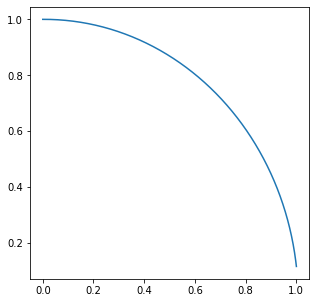

In [43]:
c=simple_contour(g,1,0.01)
plt.figure(figsize=(5,5))
plt.plot(c[0],c[1])

### Erreur accumulée

La méthode d'Euler est une méthode d'ordre 1 d'où la croissance linéaire de l'erreur avec les itérations. Un $\delta$  très petit minimise l'erreur sur un grand nombre d'itération. De plus on tachera au minimum de limiter les itérations de cette méthode en restreignant la zone d'étude afin d'éviter à l'erreur de s'accumuler

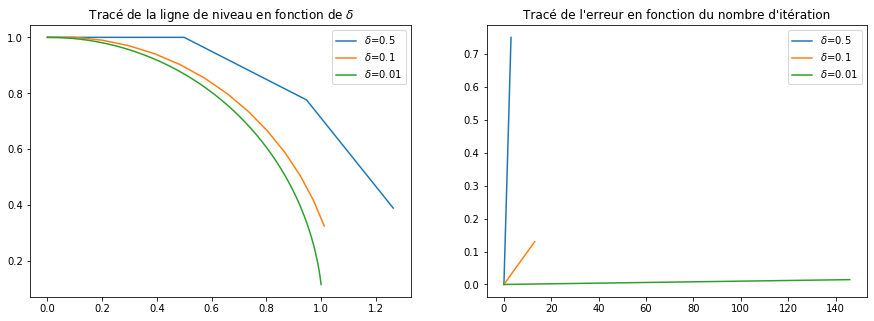

In [68]:
a=simple_contour(g,1,0.5)
b=simple_contour(g,1,0.1)
c=simple_contour(g,1,0.01)
plt.close()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title(" Tracé de la ligne de niveau en fonction de $\delta$")
plt.plot(a[0],a[1],label='$\delta$=0.5')
plt.plot(b[0],b[1],label='$\delta$=0.1')
plt.plot(c[0],c[1],label='$\delta$=0.01')
plt.legend()
plt.subplot(122)
plt.plot((np.array(a[0])**2+np.array(a[1])**2)-1,label='$\delta$=0.5')
plt.plot((np.array(b[0])**2+np.array(b[1])**2)-1,label='$\delta$=0.1')
plt.plot((np.array(c[0])**2+np.array(c[1])**2)-1,label='$\delta$=0.01')
plt.title("Tracé de l'erreur en fonction du nombre d'itération")
plt.legend()



## Utilisation du théorême des fonctions implicites

- A première vue éloignée de notion 


# Fonction de tracé
## Recherche d'amorce évoluée
On réecrit la fonction `find_seed_dicho` pour la rendre capable d'effectuer le test sur les quetres coté de la zone. On ne priorise pas une amorce plutôt qu'une autre car dans le cadre de notre méthode, il est possible que l'orientation du Gradient fasse que la ligne de niveau soit dirigéee vers un point en dehors de la cellule
- On définit 4 fonctions de type `find_seed_dicho` mais qui sont écrites pour chacun des bords d'une cellule, elle prend en argument des informations supplémentaires qui permettront à la dichotomie de s'initialiser n'importe où dans la zone de recherche.



In [70]:
def find_seed_D (g,c=0,limx=[0.,1.],limy=[0.,1.],eps=2**(-26)):
    if (g([limx[1],limy[0]])-c)*(g([limx[0],limy[0]])-c)<0:
        a,b=limx[0],limx[1]
        if g([a,limy[0]])>g([b,limy[0]]):
            a,b=b,a
        while abs(b-a)>eps:
            d=(a+b)/2
            if (g([d,limy[0]])-c)>0:
                b=d
            else:
                a=d
        return [d,limy[0]]
    else :
        return None
def find_seed_L (g,c=0,limx=[0.,1.],limy=[0.,1.],eps=2**(-26)):
    if (g([limx[0],limy[0]])-c)*(g([limx[0],limy[1]])-c)<=0 :
        a,b=limy[0],limy[1]
        if g([limx[0],a])>g([limx[0],b]):
            a,b=b,a
        while abs(b-a)>eps:
            d=(a+b)/2
            if (g([limx[0],d])-c)>0:
                b=d
            else:
                a=d
        return [limx[0],d]
    else :
        return None


def find_seed_U (g,c=0,limx=[0.,1.],limy=[0.,1.],eps=2**(-26)):
    if (g([limx[0],limy[1]])-c)*(g([limx[1],limy[1]])-c)<=0 :
        a,b=limx[0],limx[1]
        if g([a,limy[1]])>g([b,limy[1]]):
            a,b=b,a
        while abs(b-a)>eps:
            d=(a+b)/2
            if (g([d,limy[1]])-c)>0:
                b=d
            else:
                a=d
        return [d,limy[1]]
    else:
        return None
    
def find_seed_R(g,c=0,limx=[0.,1.],limy=[0.,1.],eps=2**(-26)):
    if  (g([limx[1],limy[1]])-c)*(g([limx[1],limy[0]])-c)<=0 :
        a,b=limy[0],limy[1]
        if g([limx[1],a])>g([limx[1],b]):
            a,b=b,a
        while abs(b-a)>eps:
            d=(a+b)/2
            if (g([limx[1],d])-c)>0:
                b=d
            else:
                a=d
        return [limx[1],d]
    else:
        return None



## Construction évoluée
- Dans cette nouvelle fonction `simple_contour`, on prend en plus en argument le découpage en cellule de la plage de recherche, les coordonnées de la cellule dans lequel l'algorithme parent se trouve, ainsi que le bord de la cellule depuis lequel on souhaite initialiser l'algorithme.

In [71]:
def simple_contour(g,xc,yc,nom_bord,i,j,c=0,delta=0.001):
    abscisses , ordonnées = [],[]
    dic_fonction = {"UP" : find_seed_U, "LEFT":find_seed_L, "RIGHT" : find_seed_R,"DOWN" : find_seed_D }
    position = dic_fonction[nom_bord](g,c,[xc[i],xc[i+1]], [yc[j],yc[j+1]])
    gradg=autograd.grad(g)
    if  not isinstance( position,list) :
        return [],[]
    else:
        position = np.array(position)        
        abscisses.append(position[0])
        ordonnées.append(position[1])

        def test (position):
            return xc[i]<=position[0]<=xc[i+1] and yc[j]<=position[1]<=yc[j+1]
        while test(position) :
            gradX=gradg(position)
            norme = np.sqrt(gradX[1]**2+gradX[0]**2)
            vect = np.array([gradX[1]/norme,-1*gradX[0]/norme])
            position = position + vect*delta

            abscisses.append(position[0])
            ordonnées.append(position[1])
        return abscisses,ordonnées

## Découpe et compilation des fragments
- Cette fonction ci s'atelle à parcourir l'ensemble des cellules et à dénicher dans chaque - si possible - un frgament selon le côté de la cellule sur lequel chercher l'amorce




In [73]:
def contour_complexe(f, c=0, xc = [0,1], yc = [0,1], delta = 0.01):
    xs,ys= [], []

    liste_bord = ['UP','LEFT','RIGHT','DOWN']
    for i in range(len(xc)-1):
        for j in range(len(yc)-1):
            for nom_bord in liste_bord :
                X,Y=simple_contour(f,xc,yc,nom_bord,i,j,c,delta)
                xs.append(X)
                ys.append(Y)
    return xs,ys


## Tracé

In [74]:
def trace(g,xc,yc,c=0):
    a,b=contour_complexe(g,c,xc,yc)
    for x,y in zip(a,b):
        plt.plot(x,y)

## Visualisation des lignes de niveau

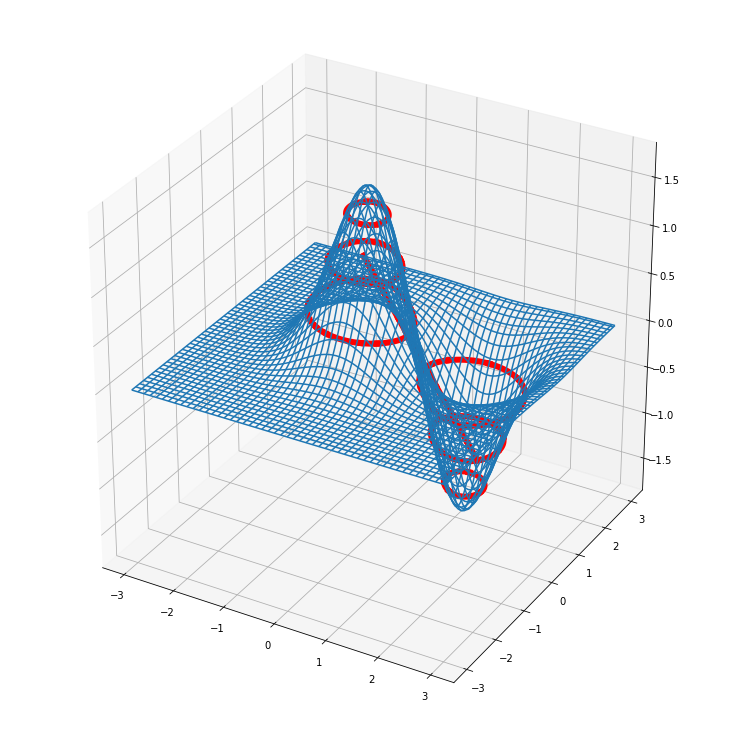

In [109]:

domain_x=np.linspace(-3,3,100)
domain_y=np.linspace(-3,3,100)
X,Y=np.meshgrid(domain_x,domain_y)
         
Z=f([X,Y])
fig=plt.figure(figsize=(10,10))

ax=Axes3D(fig)

ax.plot_wireframe(X,Y,Z, label="plot")
def trace(g,xc,yc,c=0):
    a,b=contour_complexe(f,c,np.linspace(-3,3,10),np.linspace(-3,3,10))
    for x,y in zip(a,b):
        ax.plot(x,y,c,'r',linewidth=6)
        
for i in [0,1,0.5,1.5,-0.5,-1,-1.5]:
    trace(f,np.linspace(-3,3,10),np.linspace(-3,3,10),i)
